# augmentation_with_albumentation
albumentation : 증강을 위한 라이브러리

### Tutorial
https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/

1) Object Detection
Albumentations supports four formats: pascal_voc, albumentations, coco, and yolo
- 각 format은 각자의 bouning boxes coordinates 형식이 있다.
    - pascal_voc(절대값) : [x_min, y_min, x_max, y_max]
    - albumentations(상대값) : [x_min, y_min, x_max, y_max]
    - coco(절대값) : [x_min, y_min, width, height]
    - yolo(상대값) : [x_center, y_center, width, height]

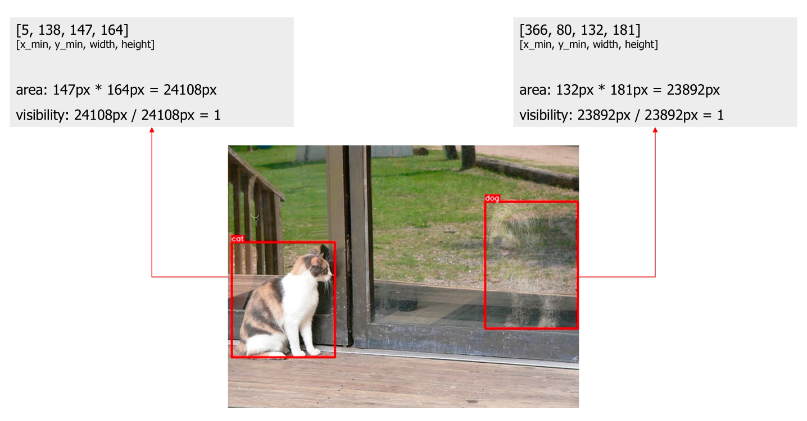

## Augmentation by Hard-coding

In [ ]:
498/2 + 140

389.0

In [ ]:
bboxs = [[5, 138, 147, 164], [366, 80, 132, 181], # 위 그림
         [390, 55, 5, 5], [110, 355, 5, 5], # xmax 초과, ymax 초과
         [5, 55, 5, 5], [110, 5, 5, 5], # xmin 미만, ymin 미만
         [110, 55, 5, 5]]

width, height = 498, 370

re_w, re_h = 280, 280

img_xmin, img_ymin, img_xmax, img_ymax = (width - re_w)/2, (height - re_h)/2, (width + re_w)/2, (height + re_h)/2
img_xmin, img_ymin, img_xmax, img_ymax

(109.0, 45.0, 389.0, 325.0)

In [ ]:
re_bboxs = []
for bbox in bboxs:
    xmin, ymin, w, h = bbox
    xmax, ymax = xmin + w, ymin + h
    print('*'*30)
    print(xmin, ymin, xmax, ymax)

    xmin, ymin, xmax, ymax = xmin - img_xmin, ymin - img_ymin, xmax - img_xmin, ymax - img_ymin
    print(xmin, ymin, xmax, ymax)
    bbox = xmin, ymin, xmax, ymax

    xxyy = []
    img_w, img_h = img_xmax-img_xmin, img_ymax-img_ymin
    for i, p in enumerate(bbox):
        if p < 0:
            p = 0
        if (i%2 == 0) and p > img_w:
            p = img_w
        if (i%2 == 1) and p > img_h:
            p = img_h
        xxyy.append(p)
    print(xxyy)
    xywh = xxyy[0], xxyy[1], xxyy[2] - xxyy[0], xxyy[3] - xxyy[1]

    if not 0 in xywh[2:]: # w. h 중 0인 경우 제외
        re_bboxs.append(xywh)

******************************
5 138 152 302
-104.0 93.0 43.0 257.0
[0, 93.0, 43.0, 257.0]
******************************
366 80 498 261
257.0 35.0 389.0 216.0
[257.0, 35.0, 280.0, 216.0]
******************************
390 55 395 60
281.0 10.0 286.0 15.0
[280.0, 10.0, 280.0, 15.0]
******************************
110 355 115 360
1.0 310.0 6.0 315.0
[1.0, 280.0, 6.0, 280.0]
******************************
5 55 10 60
-104.0 10.0 -99.0 15.0
[0, 10.0, 0, 15.0]
******************************
110 5 115 10
1.0 -40.0 6.0 -35.0
[1.0, 0, 6.0, 0]
******************************
110 55 115 60
1.0 10.0 6.0 15.0
[1.0, 10.0, 6.0, 15.0]


In [ ]:
re_bboxs

[(0, 93.0, 43.0, 164.0), (257.0, 35.0, 23.0, 181.0), (1.0, 10.0, 5.0, 5.0)]

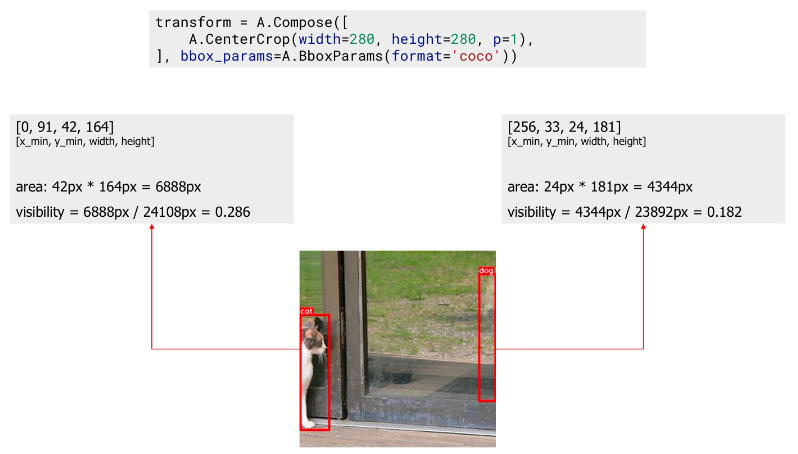

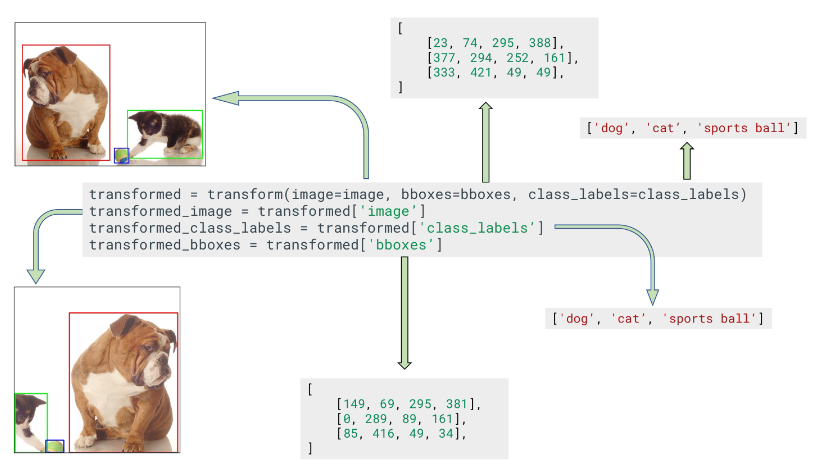

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import random

import cv2
from PIL import ImageOps,Image

In [ ]:
import albumentations as A

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
dir(A)

['AdditiveNoise',
 'AdvancedBlur',
 'Affine',
 'Any',
 'AtLeastOneBBoxRandomCrop',
 'AutoContrast',
 'BBoxSafeRandomCrop',
 'BaseCompose',
 'BasicTransform',
 'BboxParams',
 'Blur',
 'CLAHE',
 'CenterCrop',
 'CenterCrop3D',
 'ChannelDropout',
 'ChannelShuffle',
 'ChromaticAberration',
 'CoarseDropout',
 'CoarseDropout3D',
 'ColorJitter',
 'Compose',
 'ConstrainedCoarseDropout',
 'Crop',
 'CropAndPad',
 'CropNonEmptyMaskIfExists',
 'CubicSymmetry',
 'D4',
 'Defocus',
 'Downscale',
 'DualTransform',
 'ElasticTransform',
 'Emboss',
 'Equalize',
 'Erasing',
 'FDA',
 'FancyPCA',
 'FrequencyMasking',
 'FromFloat',
 'GaussNoise',
 'GaussianBlur',
 'GlassBlur',
 'GridDistortion',
 'GridDropout',
 'GridElasticDeform',
 'HistogramMatching',
 'HorizontalFlip',
 'HueSaturationValue',
 'ISONoise',
 'Illumination',
 'ImageCompression',
 'ImageOnlyTransform',
 'InvertImg',
 'KeypointParams',
 'Lambda',
 'LongestMaxSize',
 'MONO_CHANNEL_DIMENSIONS',
 'MaskDropout',
 'MedianBlur',
 'Morphological',
 'M

## Detection augmentation

In [ ]:
import albumentations as A
import cv2

In [ ]:
# mask data download
!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   2907      0 --:--:-- --:--:-- --:--:--  2916
100 3786k  100 3786k    0     0  6496k      0 --:--:-- --:--:-- --:--:-- 6496k
Archive:  roboflow.zip
 extracting: test/phplpE73q_jpg.rf.bd81cab9f8ff2674ce2e58278f7d37fa.jpg  
 extracting: train/1580128422_jpg.rf.182b42586c5d5ea95a75c17449c48ad3.jpg  
 extracting: test/1579924271_jpg.rf.be5b27c2b2801bccc191e6dbd9bfccca.jpg  
 extracting: train/w1240-p16x9-5f8aa310737f8e0e6c43d95a68a82b03b6f60106_jpg.rf.104bedd5b3bad4a0d0a453203e0617a3.jpg  
 extracting: train/pollution-mask-CE5HYF_jpg.rf.21d8ab9eb19a6cd10956c96a0cfeff57.jpg  
 extracting: test/shutterstock_1627199179_jpg.rf.8432d033a37b3d142ec4ffcede508c7d.jpg  
 extracting: train/1-200102094256105_png.rf.22dcc10b1378b9ea7f05c83d04c052aa.jpg  
 extracting: test/RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
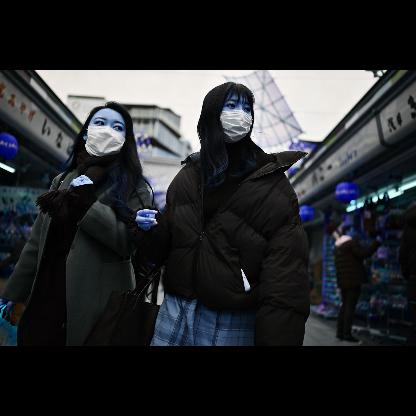

In [ ]:
img = cv2.imread('/content/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.8f09ebde8b7b3ea6f9180eff345ec176.jpg')
img

In [ ]:
with open('/content/train/-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM_jpeg.rf.8f09ebde8b7b3ea6f9180eff345ec176.txt') as f:
    result = f.read().split('\n')
result

['0 0.2548076923076923 0.30528846153846156 0.15384615384615385 0.15144230769230768',
 '1 0.8413461538461539 0.5552884615384616 0.05048076923076923 0.052884615384615384',
 '0 0.5456730769230769 0.2668269230769231 0.15144230769230768 0.15625']

In [ ]:
idx2label = {0:'mask', 1:'no-mask'}
class_labels, bboxes = [], []
for r in result:
    line = r.split()
    class_labels.append(idx2label[int(line[0])])
    bboxes.append([float(l) for l in line[1:]])
    # print()

In [ ]:
# class label 3개
class_labels

['mask', 'no-mask', 'mask']

In [ ]:
# bbox (x, y, w, h) 3개
bboxes

[[0.2548076923076923,
  0.30528846153846156,
  0.15384615384615385,
  0.15144230769230768],
 [0.8413461538461539,
  0.5552884615384616,
  0.05048076923076923,
  0.052884615384615384],
 [0.5456730769230769, 0.2668269230769231, 0.15144230769230768, 0.15625]]

In [ ]:
bboxes[0] # 첫번째 object bbox (x, y, w, h)

[0.2548076923076923,
 0.30528846153846156,
 0.15384615384615385,
 0.15144230769230768]

In [ ]:
# album transform
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='yolo',label_fields=['class_labels']))

# transform = A.Compose([
#     A.RandomCrop(width=450, height=450),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.2),
# ], bbox_params=A.BboxParams(format='coco', min_area=1024, min_visibility=0.1, label_fields=['class_labels']))

In [ ]:
transformed = transform(image=img, bboxes=bboxes, class_labels=class_labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']

array([[[211, 209, 215],
        [221, 219, 225],
        [223, 222, 226],
        ...,
        [ 71,  72,  76],
        [ 78,  77,  79],
        [ 77,  77,  77]],

       [[218, 217, 221],
        [227, 223, 228],
        [228, 224, 229],
        ...,
        [ 77,  76,  80],
        [ 81,  78,  80],
        [ 79,  74,  75]],

       [[223, 222, 226],
        [228, 224, 229],
        [229, 225, 230],
        ...,
        [ 86,  81,  83],
        [ 83,  77,  78],
        [ 76,  69,  66]],

       ...,

       [[ 10,  11,   9],
        [ 10,  11,   9],
        [  8,  10,  11],
        ...,
        [ 30,  49,  57],
        [ 31,  47,  53],
        [ 33,  48,  51]],

       [[ 10,  11,   9],
        [ 10,  11,   9],
        [  8,  10,  11],
        ...,
        [ 30,  47,  56],
        [ 30,  46,  52],
        [ 31,  46,  49]],

       [[ 10,  11,   9],
        [ 10,  11,   9],
        [  8,  10,  11],
        ...,
        [ 30,  48,  55],
        [ 32,  46,  52],
        [ 33,  46,  48]]], dtype=uint8)
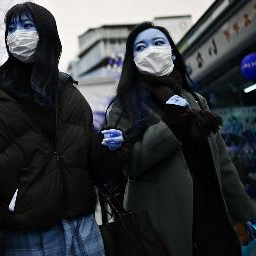

In [ ]:
transformed_image

In [ ]:
transformed_bboxes

[[0.5976562686264515,
  0.1835937537252903,
  0.2499999850988388,
  0.2460937201976776],
 [0.1250000074505806,
  0.1240234412252903,
  0.2460937201976776,
  0.2480468824505806]]

In [ ]:
transformed_class_labels

['mask', 'mask']

### 문제
아래 조건에 맞춰 임의의 이미지 하나를 증강처리해보자.  
- 공간 수준 증강 기법을 1개 이상 사용할 것
- min_area, min_visibility 값 설정